#**Topic: Sentimental Analysis on RBI's decission of changing Repo Rate.**

## **What is Repo Rate?**

- Repo rate is the rate at which the central bank of a country (Reserve Bank of India in case of India) lends money to commercial banks in the event of any shortfall of funds. Repo rate is used by monetary authorities to control inflation. The increase in Repo means the costs of funds for banks will go up. It result in banks increasing their bank lending rate. So, basically the policy action of increase in Repo rate by central bank will lead to increase in interest rate in the economy. The increase in interest rate in the economy changes many economy wide investment decisions. It also effects financial markets.
   

- The RBI's repo rate has been kept unchanged at 4 percent since May 2020. That's the rate at which the central bank lends short-term funds to banks.The Reserve Bank of India (RBI) raised the repo rate - at which it lends money to commercial banks - by 40 basis points to 4.4% very recently.

- The rate had been reduced to a record low of 4% during the Covid-19 pandemic.
RBI governor Shaktikanta Das made the surprise announcement during an online media briefing on Wednesday.


- Sometimes, in a economy people beliefs or sentiments about a policy change affects the economy more than that policy does. So, we think our sentimental analysis on repo rates serves the purpose of analyzing how positive or negative the sentiments of people regarding this policy action.

# **What is Sentiment Ananlysis?**
- Purpose is to examine sentiments of the public on the subject of interest by classifying text based on their polarity and subjectivity.
- Extracting subjective information from social media platforms like Twitter.
- Surface level analysis of subjective information regarding a socio-economic-political change in the society, or some brand, its project and services.

 ### **Polarity of sentiments.**
 - Sentiments are analysed based on their degree of polarity.
 - Score is assigned to positivity, neutrality and negativity of the sentiments by setting limits as +1 to -1.

 ### **Subjectivity of sentiments.**
 - Degree to which the person is involved personally and emotionally with the subject at hand.
 - Here the limits are 0 to 1. Higher the degree of subjectivity, closer is the data point to 1.
 - If it is closer to 0, then the tweet is more objective than subjective.

In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [ ]:
#Twitter
authentication_key = "d2XSClJQmtOtSDHuIHoskBdkk"
secret = "gAt681537WFK0pJAsCgJDdEK1QmU05hn8YcNrtIaaBhaVsePKZ"
access_token = "1520110810562895878-DO72c34e7dhkB6VUXsWhuNtTkVTLIC"
token_secret = "i4DmRuSgjUtL6LIe8PKYCUNG12tcOoFEbOAwQMlmonPdN"

In [ ]:
authenticate= tweepy.OAuthHandler(authentication_key, secret)
authenticate.set_access_token(access_token,token_secret )
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
interested_user = api.get_user("elonmusk")

In [ ]:
interested_user.description

''

In [ ]:
#tweets = api.user_timeline(screen_name = "narendramodi", count = 1000, lang = "en", tweet_mode = "extended")

In [ ]:
tweets = api.search(q = "repo rate",lang = "en", count = 2000, tweet_mode = "extended")

for tweet in tweets:
  print(tweet.full_text)

RT @DamnYeahCrypto: @42macroDDale He will do a stealth pivot by lowering the Reverse Repo rate.
RT @ScottSkyrm: The Repo rate corridor is an unofficial floor and ceiling for Repo rates. The upper bound is the Standing Repo Facility (SR…
How RBI's repo rate hike has pushed small finance banks and private banks to offer as high as 7% on three-year FDs https://t.co/IwGUPDxz8Y
RT @kharge: IIP &lt; 2% for 5 months
CPI: At an 8 year high
WPI: At a 9 year high
Trade deficit: All-time high
Repo Rate: At a 2 year high
Rup…
RT @pinkysithole17: The SARB may very well increase the repo rate by 50bps today. Those with savings accounts will celebrate higher interes…
@RubikaLiyaquat @ABPNews What about REPO rate ? Do bit shame an debate on real issues.
RT @kharge: IIP &lt; 2% for 5 months
CPI: At an 8 year high
WPI: At a 9 year high
Trade deficit: All-time high
Repo Rate: At a 2 year high
Rup…
INDIA CENBANK SAYS TO CONDUCT 14-DAY VARIABLE RATE REVERSE REPO AUCTION FOR 4 TRLN RUPEES #News #Forex #CENB

In [ ]:
tweetss =[]
for tweet in tweets:
  tweetss.append(tweet.full_text)


In [ ]:
df = pd.DataFrame(tweetss, columns = ['Tweets'])

In [ ]:
df

,Tweets
0,RT @DamnYeahCrypto: @42macroDDale He will do a...
1,RT @ScottSkyrm: The Repo rate corridor is an u...
2,How RBI's repo rate hike has pushed small fina...
3,RT @kharge: IIP &lt; 2% for 5 months\nCPI: At ...
4,RT @pinkysithole17: The SARB may very well inc...
...,...
95,"the repo-rate should be increased &amp; if so,..."
96,CHINA https://t.co/TSPsnmexh1 SAYS SETS 7-DAY ...
97,@WallWorry @DiMartinoBooth Reverse repo is a s...
98,'RBI rate hike was moderate as CRR was also ra...


In [ ]:
# clean the tweets

def clean_text(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT_[A-Za-z0-9]:+', '', text)
  text = re.sub(r'https?:\/\/\S+', '',text)
  return text

df['Tweets'] = df['Tweets'].apply(clean_text)


In [ ]:
df

,Tweets
0,RT : He will do a stealth pivot by lowering t...
1,RT : The Repo rate corridor is an unofficial f...
2,How RBI's repo rate hike has pushed small fina...
3,RT : IIP &lt; 2% for 5 months\nCPI: At an 8 ye...
4,RT : The SARB may very well increase the repo ...
...,...
95,"the repo-rate should be increased &amp; if so,..."
96,CHINA SAYS SETS 7-DAY REVERSE REPO RATE AT 2....
97,Reverse repo is a sign of excessive cash in ...
98,'RBI rate hike was moderate as CRR was also ra...


In [ ]:
# getting subjectivity and polarity
def get_subjectivity(tweet):
  subjectivity =TextBlob(tweet).sentiment.subjectivity
  return subjectivity

def get_polarity(tweet):
  polarity = TextBlob(tweet).sentiment.polarity
  return polarity

In [ ]:
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

In [ ]:
df.head()

,Tweets,Subjectivity,Polarity
0,RT : Alert: Repo rate increased for the first ...,0.333333,0.25000
1,RT : Impact of Repo Rate Hike on Stock Market!...,0.000000,0.00000
2,"RT _venkatesh: 3/ Also key to note, Governor’s...",1.000000,0.00000
3,RT : RBI hiked Repo rate by 40 basis points to...,0.453750,0.15875
4,RT : RBI just raised the repo rate 😱 and the s...,0.687500,-0.31250


In [ ]:
def sentimentalaysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
df['Sentiment Analysis'] = df['Polarity'].apply(sentimentalaysis)

In [ ]:
df

,Tweets,Subjectivity,Polarity,Sentiment Analysis
0,RT : Alert: Repo rate increased for the first ...,0.333333,0.250000,Positive
1,RT : Impact of Repo Rate Hike on Stock Market!...,0.000000,0.000000,Neutral
2,"RT _venkatesh: 3/ Also key to note, Governor’s...",1.000000,0.000000,Neutral
3,RT : RBI hiked Repo rate by 40 basis points to...,0.453750,0.158750,Positive
4,RT : RBI just raised the repo rate 😱 and the s...,0.687500,-0.312500,Negative
...,...,...,...,...
95,What is repo rate:\n\nRepo rate or repurchase ...,0.350000,0.133333,Positive
96,RBI in a sudden move has increased the repo ra...,0.438889,-0.041667,Negative
97,RT : Aggressive monetaryPolicy by Central Bank...,0.250000,0.000000,Neutral
98,RBI governor Shakti Kant Das recently stated -...,0.250000,0.000000,Neutral


# Visualization of polarity and subjectivity


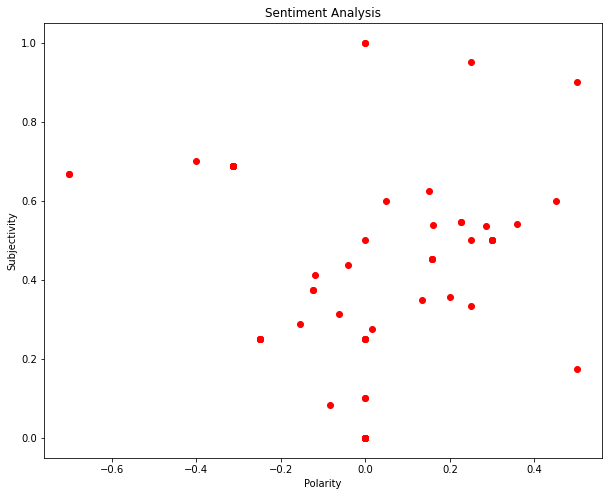

In [ ]:
#ploting polarity and subjectivity

#Scatter plot - plots relationship between two variables
#we plotted the relationship between polarity and subjectivity
#we can observe a slightly positive correlation between the two
#we can also observe a greater aggreagation of point in the range from neutral to slightly positive sentiment
plt.figure(figsize = (10,8))
for i in range(0, len(df)):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Calculating percentage of positive tweets, neutral and negative tweets
positive_tweets = df[df['Sentiment Analysis'] == "Positive"]
neutral_tweets = df[df['Sentiment Analysis'] == "Neutral"]
negative_tweets = df[df['Sentiment Analysis'] == "Negative"]


In [ ]:
percentage_positive_tweets = (len(positive_tweets)/len(df))*100
percentage_positive_tweets


23.0

In [ ]:
percentage_neutral_tweets = (len(neutral_tweets)/len(df))*100
percentage_neutral_tweets

55.00000000000001

In [ ]:
percentage_negative_tweets = (len(negative_tweets)/len(df))*100
percentage_negative_tweets

22.0

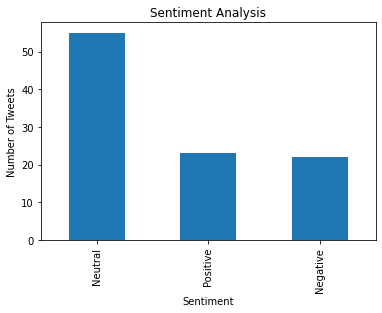

In [ ]:
#Bar plot - number of tweets versus value Counts of sentiments
#we can see a higher representation of neutral tweets
df['Sentiment Analysis'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
df['Sentiment Analysis'].value_counts().plot(kind = "bar")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


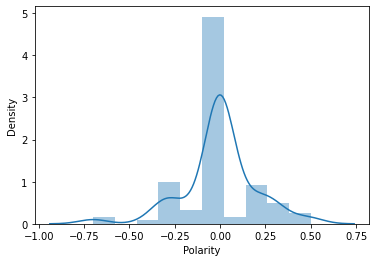

In [ ]:
import seaborn as sns
#distribution plot - frequency distribution for polarity, it plots histogram and line graph
#Polarity sentiment showed a higher proportion of in the neutral range
#we can interpret that people had neither positive nor negative sentiment
#we see a greater representation in the at the mean giving us a normal distribution
sns.distplot(df["Polarity"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


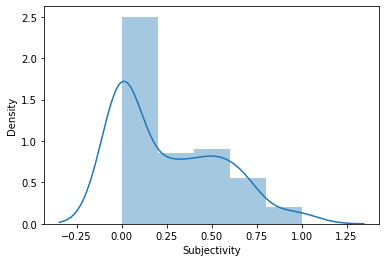

In [ ]:
#distribution plot - frequency distribution for subjectivity
#We can again observe a higher proportion of neutral sentiment.

sns.distplot(df["Subjectivity"])

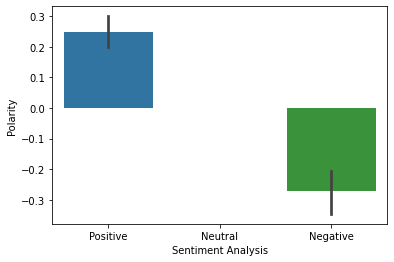

In [ ]:
# bar plot - used for categorical data
sns.barplot(x = 'Sentiment Analysis', y = 'Polarity', data = df)

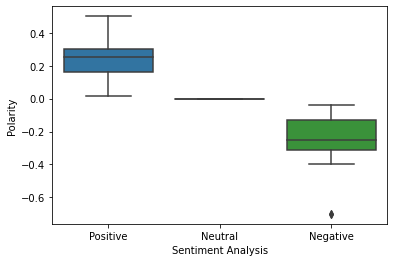

In [ ]:
#box and whisker plot - used to display distribution by representing minimum, first quartile, median, third quartile and maximum.
#We used this plot to visualize the distribution of data points within each category. We observed an outlier in the negative polarity category
sns.boxplot(x = "Sentiment Analysis", y = "Polarity", data = df)

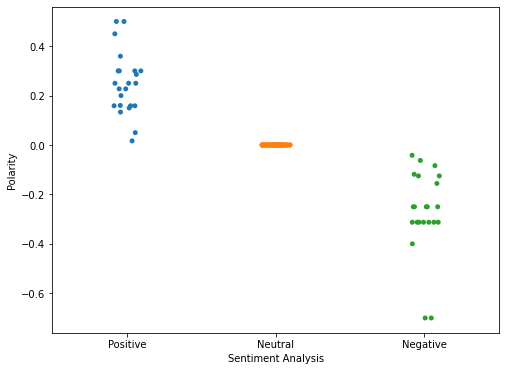

In [ ]:
#we performed the same visualization as the box plot in terms of a strip plot
#This plots distribution and represents each point
plt.figure(figsize = (8,6))

sns.stripplot(x = "Sentiment Analysis", y = "Polarity", data = df)

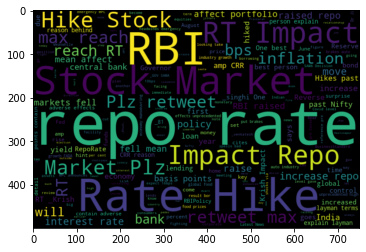

In [ ]:
#We used wordcloud to visually represent text. We extracted words from the tweets.
#The size of these words depends on the frequency of occurrence.

words = ' '.join([tweets for tweets in df['Tweets']])
wordcloud = WordCloud(width = 750, height = 500, random_state= 21, max_font_size= 200).generate(words)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

In [ ]:
a = df['Polarity'].sort_values()

In [ ]:
a

74   -0.700000
6    -0.700000
77   -0.400000
23   -0.312500
66   -0.312500
        ...   
27    0.300000
70    0.359375
99    0.450000
21    0.500000
12    0.500000
Name: Polarity, Length: 100, dtype: float64

In [ ]:
df['Tweets'].iloc[74]

'RT : RepoRate: The hike spells bad news for those who were looking to take a home or an auto loan. Read for details \n\nRBIPolicy…'